
# unsupervised learning

In [10]:
# importing a biomedical image
from skimage import io

coll = io.ImageCollection(r'C:\Users\HP\Desktop\MMNS\Image Recognition and Deep Machine Learning\Ass2\Files_project\image_dataset'+'\*.tif')        
coll.files                   

['C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Files_project\\image_dataset\\F01_120w1.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Files_project\\image_dataset\\F01_120w2.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Files_project\\image_dataset\\F01_202w1.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Files_project\\image_dataset\\F01_202w2.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Files_project\\image_dataset\\F01_204w1.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Files_project\\image_dataset\\F01_204w2.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Files_project\\image_dataset\\F01_291w1.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Files_project\

In [2]:
#display an image 

import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
# color composition
im_comp = np.dstack([coll[3]/coll[3].max(),coll[2]/coll[2].max(),coll[1]/coll[1].max()])

#histogram equalization

for i in range(3):
    v_min, v_max = np.percentile(im_comp[:,:,i],(2,98))
    im_comp[:,:,i]=exposure.rescale_intensity(im_comp[:,:,i],in_range=(v_min,v_max))
    
plt.figure(figsize=(20,10))
plt.imshow(im_comp)
io.show()


In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

<Figure size 2000x1000 with 1 Axes>

## Data Transformation for unsupervised learning


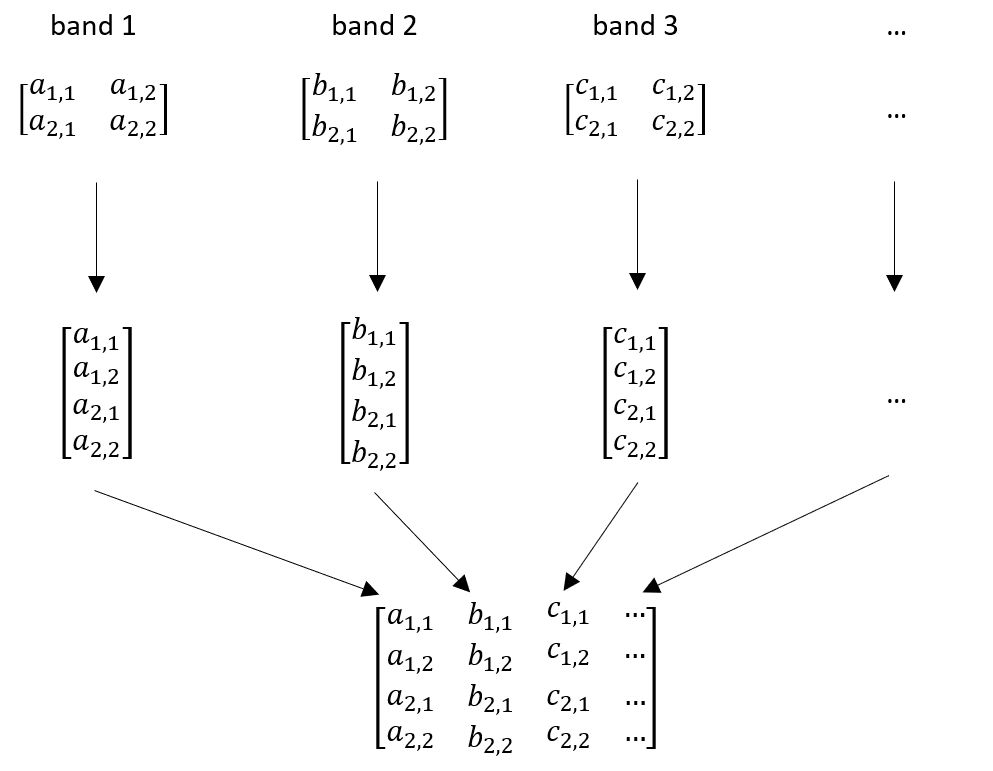


In [3]:
# step 1 : transformation from 2d arrays to vectors

X1 = coll[3].flatten()
X2 = coll[2].flatten()
X3 = coll[1].flatten()

print(coll[3].shape)
print(X1.shape)

# step 2 : stacking vectors into 2d arrays

X = np.stack([X1,X2,X3]).T
print(X.shape)

(1040, 1392)
(1447680,)
(1447680, 3)


In [4]:
!pip install scikit-learn

# K-Means clustering 

In [5]:
# clustering of pixels

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, random_state=2, algorithm = "full")
Y = kmeans.fit_predict(X)

print(Y)

[0 0 0 ... 2 2 2]


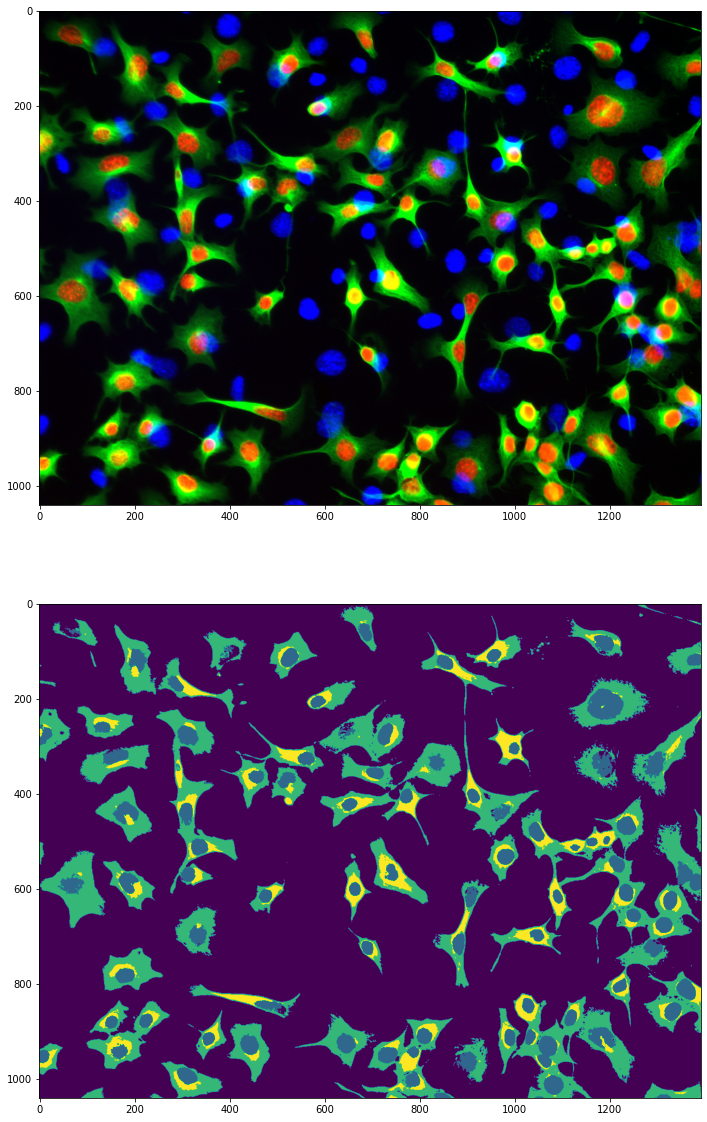

In [6]:
#displaying the results of the clustering
Y_im=Y.reshape(coll[0].shape)

fig, arr=plt.subplots(2,1,figsize=(40,20))

arr[0].imshow(im_comp)
arr[1].imshow(Y_im)

-----
# Assessment of classification results

## 1. Loading and visualizing test/validation data


In [7]:
import numpy as np

p_val = np.loadtxt(r'C:\Users\HP\Desktop\MMNS\Image Recognition and Deep Machine Learning\Ass2\Files_project\test_points.txt',dtype='int')


p_val

array([[ 225, 1259,    1],
       [ 229, 1260,    1],
       [ 189, 1261,    1],
       [ 162, 1175,    1],
       [ 161, 1181,    1],
       [ 161, 1182,    1],
       [ 161, 1187,    1],
       [ 163, 1191,    1],
       [ 164, 1194,    1],
       [ 166, 1195,    1],
       [ 183, 1246,    1],
       [ 190, 1253,    1],
       [ 193, 1253,    1],
       [ 200, 1255,    1],
       [ 211, 1256,    1],
       [ 215, 1254,    1],
       [ 217, 1258,    1],
       [ 212, 1266,    1],
       [ 212, 1266,    1],
       [ 213, 1268,    1],
       [ 226, 1265,    1],
       [ 221, 1264,    1],
       [ 205, 1263,    1],
       [ 223, 1264,    1],
       [ 239, 1262,    1],
       [ 232, 1260,    1],
       [ 222, 1261,    1],
       [ 248, 1139,    1],
       [ 243, 1138,    1],
       [ 242, 1135,    1],
       [ 239, 1132,    1],
       [ 234, 1130,    1],
       [ 237, 1132,    1],
       [ 240, 1133,    1],
       [ 245, 1134,    1],
       [ 247, 1136,    1],
       [ 250, 1139,    1],
 

In [8]:
# running script with auxiliary functions
%run functions.ipynb

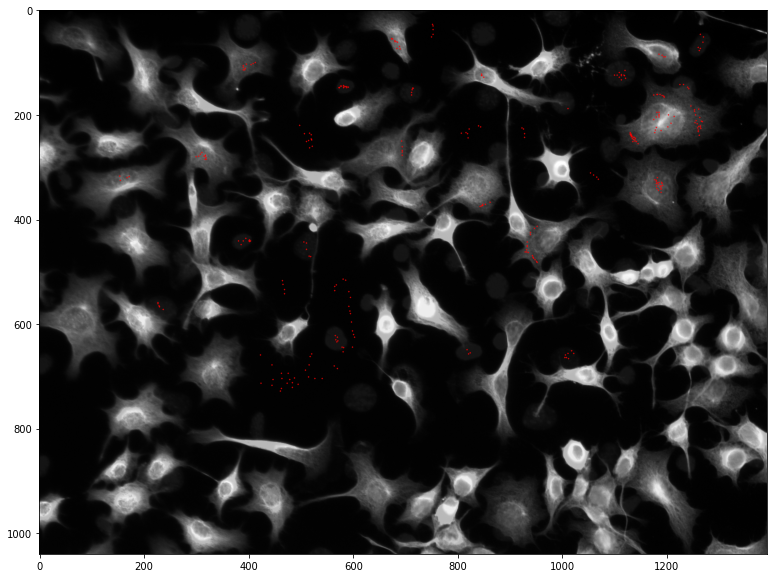

In [20]:
# displaying test/validation points
from skimage.color import rgb2gray

im_comp_pval = visualize_points(im_comp,p_val)

plt.figure(figsize=(20,10))
plt.imshow(im_comp_pval)

# Classification results assessment (validation)

Overall accuracy: 2.0%:


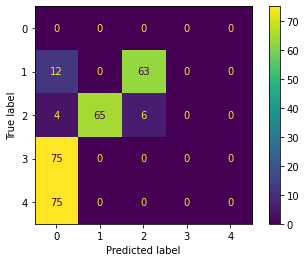

In [9]:
# reading classes of points from classification results
pred_val3 = Y_im[p_val[:,0],p_val[:,1]]

# overall accuracy
from sklearn.metrics import accuracy_score
ovAcc3 = accuracy_score(p_val[:,2],pred_val3)
print("Overall accuracy: " + str(100*ovAcc3) + "%:")

# confusion matrix
from sklearn.metrics import confusion_matrix
confM3 = confusion_matrix(p_val[:,2],pred_val3)

# visualisation of the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp3 = ConfusionMatrixDisplay(confM3)
disp3.plot()